In [5]:
%run ./twitter_confidential.ipynb

In [1]:
import tweepy as tw
import pandas as pd
import itertools
import collections
import re
import datetime

# Making a twitter analysis tool 

In [6]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

#### Doing a sentiment analysis
#### Let us find the most used words with the hashtag #ElonMusk

In [7]:
search_words = '#ElonMusk + -filter:retweets' # filtering retweeets
tweet = []
likes = []
time = []
# Credits to Alvaro H.G for this part of the code from stackoverflow, taken from 
#https://stackoverflow.com/questions/64198102/collect-tweets-in-a-specific-time-period-in-tweepy-until-and-since-doesnt-work
today = datetime.datetime.now()
today = today.replace(hour=23, minute=59, second=59, microsecond=999999) 
time_to_the_past = 1
yesterday = today - datetime.timedelta(time_to_the_past)
next_day = yesterday + datetime.timedelta(time_to_the_past)

In [8]:
# Since this is a sample analysis, we only take the last 250 tweets, although we can take more later if needed
for i in tw.Cursor(api.search_tweets,q=search_words,lang="en",until = next_day.date()).items(250):
    tweet.append(i.text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [9]:
df = pd.DataFrame({'tweets':tweet,'Likes':likes,'time':time})

In [10]:
df

,tweets,Likes,time
0,@c0insbit we are going to the moon soon 🚀🚀#FAC...,0,2021-12-24 23:59:11+00:00
1,@binance @BabyDogecoin\n@elonmusk\n@binance\n#...,1,2021-12-24 23:56:18+00:00
2,@MajesticDrama @cure_token The best investment...,2,2021-12-24 23:54:59+00:00
3,COINMARKETCAP: 1 EtherLite ETL = $0.0101 USD 👉...,2,2021-12-24 23:51:04+00:00
4,Tesla won’t let you play video games in moving...,1,2021-12-24 23:50:52+00:00
...,...,...,...
245,scene @dogecoin and @elonmusk 🎩\n\n#Doge &amp;...,2,2021-12-24 19:41:51+00:00
246,@shibainuart @GamingShibaBSC is The best inves...,0,2021-12-24 19:41:13+00:00
247,a very good project you must be enthusiastic t...,0,2021-12-24 19:41:02+00:00
248,@Volterra_Eco @elonmusk @RealEmpireToken @Panc...,0,2021-12-24 19:40:52+00:00


In [11]:
# Function to remove the URL from the tweets
def remove_url(txt):
     return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())


In [12]:
tweet_no_url = [remove_url(tweet) for tweet in tweet]
tweet_no_url[:5]

['c0insbit we are going to the moon soon FACEMETA FaceMetaToken Metaverse MarkZuckerberg Facebook Meta BSC',
 'binance BabyDogecoinelonmuskbinancebinanceElonMuskBabyDoge BabyDogeArmy EthereumBlockchain',
 'MajesticDrama curetoken The best investment youll make this year Love the community energy',
 'COINMARKETCAP 1 EtherLite ETL 00101 USD OneClick Validator Node Deployment plus B',
 'Tesla wont let you play video games in moving cars anymore tesla elonmusk videogames']

In [13]:
#words_in_tweet = [tweet_no_url.lower().split() for i in tweet_no_url]
#words_in_tweet[:2]

In [14]:
# Cleaning the data of all the hashtags, and emojis etc
tweet_no_url = [re.sub(r'[^A-Za-z0-9 ] + ', '', i) for i in tweet_no_url ]
tweet_no_url
words = []
for word in tweet_no_url:
    if word != '':
        words.append(word)
words

['c0insbit we are going to the moon soon FACEMETA FaceMetaToken Metaverse MarkZuckerberg Facebook Meta BSC',
 'binance BabyDogecoinelonmuskbinancebinanceElonMuskBabyDoge BabyDogeArmy EthereumBlockchain',
 'MajesticDrama curetoken The best investment youll make this year Love the community energy',
 'COINMARKETCAP 1 EtherLite ETL 00101 USD OneClick Validator Node Deployment plus B',
 'Tesla wont let you play video games in moving cars anymore tesla elonmusk videogames',
 'elonmusk in the dontlookupfilm the rockets that landed on earth at the end are using Draco rocketsDid they ask',
 'Santa surprised me with this present elonmusk ElonMusk ELON Christmas SantaClaus Santa MerryChristmas',
 'RoshanRinaldi Manchin will changes his mind if a Scrooge such as ElonMusk Trump PeterThief told him to not do it',
 'DutchGemHunter CucuWakmet ezatong Rehatkuu lets to HoldexArmy brooHoldexArmy HoldexToTheMoon',
 'Saitamaguru1 GamingShibaBSC is The best investment youll make this year Love the communit

In [16]:
def convert(lst):
    return ([i for item in lst for i in item.split()])

listt = convert(words)
listt


['c0insbit',
 'we',
 'are',
 'going',
 'to',
 'the',
 'moon',
 'soon',
 'FACEMETA',
 'FaceMetaToken',
 'Metaverse',
 'MarkZuckerberg',
 'Facebook',
 'Meta',
 'BSC',
 'binance',
 'BabyDogecoinelonmuskbinancebinanceElonMuskBabyDoge',
 'BabyDogeArmy',
 'EthereumBlockchain',
 'MajesticDrama',
 'curetoken',
 'The',
 'best',
 'investment',
 'youll',
 'make',
 'this',
 'year',
 'Love',
 'the',
 'community',
 'energy',
 'COINMARKETCAP',
 '1',
 'EtherLite',
 'ETL',
 '00101',
 'USD',
 'OneClick',
 'Validator',
 'Node',
 'Deployment',
 'plus',
 'B',
 'Tesla',
 'wont',
 'let',
 'you',
 'play',
 'video',
 'games',
 'in',
 'moving',
 'cars',
 'anymore',
 'tesla',
 'elonmusk',
 'videogames',
 'elonmusk',
 'in',
 'the',
 'dontlookupfilm',
 'the',
 'rockets',
 'that',
 'landed',
 'on',
 'earth',
 'at',
 'the',
 'end',
 'are',
 'using',
 'Draco',
 'rocketsDid',
 'they',
 'ask',
 'Santa',
 'surprised',
 'me',
 'with',
 'this',
 'present',
 'elonmusk',
 'ElonMusk',
 'ELON',
 'Christmas',
 'SantaClaus',
 '

In [ ]:
#flat_tweet = list(itertools.chain(*listt))
#flat_tweet

In [17]:
import spacy 
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.corpus import stopwords
words_list = []
# Let us remove all the stop/common words such as a, the etc
for word in listt:
    if word not in nlp.Defaults.stop_words:
        words_list.append(word)

words_list

['c0insbit',
 'going',
 'moon',
 'soon',
 'FACEMETA',
 'FaceMetaToken',
 'Metaverse',
 'MarkZuckerberg',
 'Facebook',
 'Meta',
 'BSC',
 'binance',
 'BabyDogecoinelonmuskbinancebinanceElonMuskBabyDoge',
 'BabyDogeArmy',
 'EthereumBlockchain',
 'MajesticDrama',
 'curetoken',
 'The',
 'best',
 'investment',
 'youll',
 'year',
 'Love',
 'community',
 'energy',
 'COINMARKETCAP',
 '1',
 'EtherLite',
 'ETL',
 '00101',
 'USD',
 'OneClick',
 'Validator',
 'Node',
 'Deployment',
 'plus',
 'B',
 'Tesla',
 'wont',
 'let',
 'play',
 'video',
 'games',
 'moving',
 'cars',
 'anymore',
 'tesla',
 'elonmusk',
 'videogames',
 'elonmusk',
 'dontlookupfilm',
 'rockets',
 'landed',
 'earth',
 'end',
 'Draco',
 'rocketsDid',
 'ask',
 'Santa',
 'surprised',
 'present',
 'elonmusk',
 'ElonMusk',
 'ELON',
 'Christmas',
 'SantaClaus',
 'Santa',
 'MerryChristmas',
 'RoshanRinaldi',
 'Manchin',
 'changes',
 'mind',
 'Scrooge',
 'ElonMusk',
 'Trump',
 'PeterThief',
 'told',
 'DutchGemHunter',
 'CucuWakmet',
 'ezat

In [19]:
counter = collections.Counter(words_list)

In [20]:
frequency = counter.most_common(10)
frequency

[('ElonMusk', 63),
 ('elonmusk', 56),
 ('We', 25),
 ('czbinance', 23),
 ('going', 22),
 ('Tesla', 22),
 ('listed', 21),
 ('best', 20),
 ('Christmas', 20),
 ('I', 20)]

In [21]:
df = pd.DataFrame(words_list)

In [22]:
df.head()
df = df[0].value_counts()

In [23]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


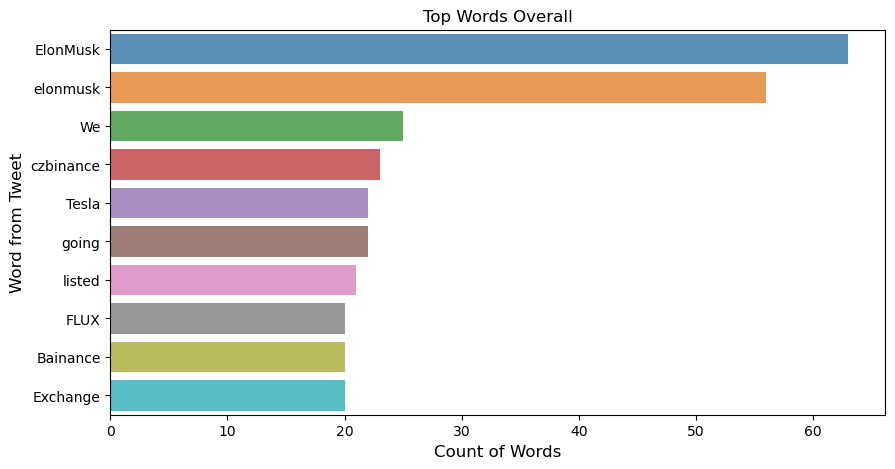

In [29]:
# Credits to Alex the Analyst for the part of the code, his youtube profile can be found at 
#https://www.youtube.com/channel/UC7cs8q-gJRlGwj4A8OmCmXg
df = df[:10,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

### Let us now find the most used hashtag with #ElonMusk in the last 100 tweets

In [24]:
# split the sentences in the list into seprate strins
def convert(lst):
    return ([i for item in lst for i in item.split()])

listt2 = convert(tweet)
listt2

['@c0insbit',
 'we',
 'are',
 'going',
 'to',
 'the',
 'moon',
 'soon',
 '🚀🚀#FACEMETA',
 '#FaceMetaToken',
 '#Metaverse',
 '#MarkZuckerberg',
 '#Facebook',
 '#Meta',
 '#BSC…',
 'https://t.co/zafusB0IEs',
 '@binance',
 '@BabyDogecoin',
 '@elonmusk',
 '@binance',
 '#binance',
 '#ElonMusk',
 '#BabyDoge',
 '#BabyDogeArmy',
 '#Ethereum',
 '#Blockchain…',
 'https://t.co/UqqvsFLb6M',
 '@MajesticDrama',
 '@cure_token',
 'The',
 'best',
 'investment',
 "you'll",
 'make',
 'this',
 'year!!!!',
 'Love',
 'the',
 'community',
 'energy!!!…',
 'https://t.co/8I6wrE2c5J',
 'COINMARKETCAP:',
 '1',
 'EtherLite',
 'ETL',
 '=',
 '$0.0101',
 'USD',
 '👉',
 'https://t.co/tIdiA3xydY',
 '👈',
 'One-Click',
 'Validator',
 'Node',
 'Deployment',
 'plus',
 'B…',
 'https://t.co/QYXWNNuhxp',
 'Tesla',
 'won’t',
 'let',
 'you',
 'play',
 'video',
 'games',
 'in',
 'moving',
 'cars',
 'anymore',
 '-',
 'https://t.co/TtK9Ws84o7',
 '#tesla',
 '#elonmusk',
 '#videogames…',
 'https://t.co/KpIPnNcgeX',
 '@elonmusk',
 'in',

In [25]:
# Now filter the words that start with a hashtag
listt2 = [re.sub(r"(\W+)$", "", i) for i in listt2]
words_no_hash = []
for word in listt2:
    if word.startswith('#'):
        words_no_hash.append(word)
words_no_hash

['#FaceMetaToken',
 '#Metaverse',
 '#MarkZuckerberg',
 '#Facebook',
 '#Meta',
 '#BSC',
 '#binance',
 '#ElonMusk',
 '#BabyDoge',
 '#BabyDogeArmy',
 '#Ethereum',
 '#Blockchain',
 '#tesla',
 '#elonmusk',
 '#videogames',
 '#ElonMusk',
 '#ELON',
 '#Christmas',
 '#SantaClaus',
 '#Santa',
 '#MerryChristmas',
 '#ElonMusk',
 '#PeterThief',
 '#HoldexArmy',
 '#HoldexArmy',
 '#HoldexToTheMoon',
 '#SnoopDogeArmy',
 '#elonmusk',
 '#ElonMusk',
 '#dogecoin',
 '#MiniPurpleFloki',
 '#Defi',
 '#Metaverse',
 '#MiniPurpleFloki',
 '#Defi',
 '#Metaverse',
 '#crypto',
 '#Bitcoin',
 '#SHIB',
 '#shibainu',
 '#DOT',
 '#crypto',
 '#trending',
 '#profit',
 '#investment',
 '#news',
 '#elonmusk',
 '#binance',
 '#coinbase',
 '#cryptocom',
 '#CoinbasePro',
 '#MiniPurpleFloki',
 '#Defi',
 '#Metaverse',
 '#ElonMusk',
 '#Crypto',
 '#Pancakeswap',
 '#token',
 '#BinanceSmartChain',
 '#nft',
 '#nftcommunity',
 '#crypto',
 '#Linux',
 '#ElonMusk',
 '#philanthropy',
 '#Giveaway',
 '#MONEY',
 '#nature',
 '#forests',
 '#wildlife

In [26]:
df2 = pd.DataFrame(words_no_hash)
# dropping all the columns with #ElonMusk in it
df2.drop(df2.index[df2[0] == '#ElonMusk'], inplace = True)

In [27]:
df2 = df2[0].value_counts()

C:\Users\nachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


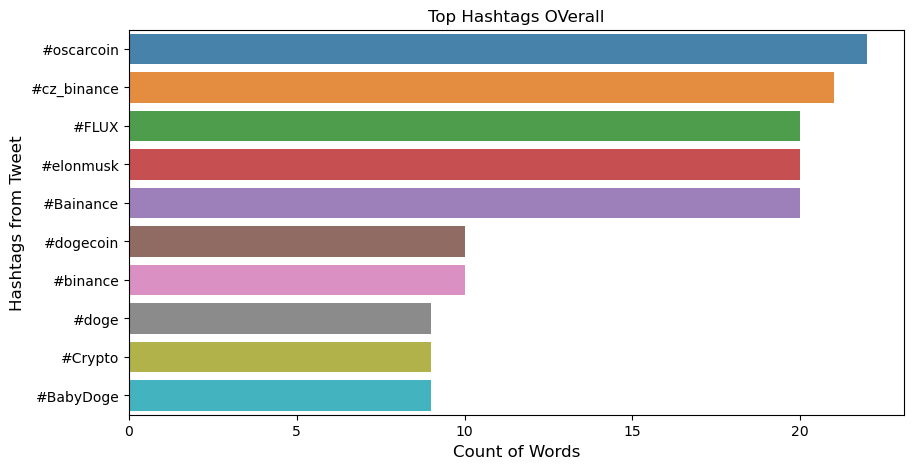

In [28]:
df2 = df2[:10,]
plt.figure(figsize=(10,5))
sns.barplot(df2.values, df2.index, alpha=0.9)
plt.title('Top Hashtags OVerall')
plt.ylabel('Hashtags from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()